# BERLIN AIRBNB DATASET
Gradient Boosting Regression vs TensorFlow DNN-Regressor

# First look and data frame creation

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the dataset
df = pd.read_csv('listings_summary.csv')

In [2]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [3]:
# Dropping not necessary columns. Criteria: intuition and common sense.
df.drop(['listing_url', 'scrape_id', 'last_scraped', 'experiences_offered', 'neighborhood_overview',
        'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_about', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'host_is_superhost',
       'city', 'state', 'zipcode', 'market', 'weekly_price', 'monthly_price', 
       'smart_location', 'country_code', 'country','calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90', 'instant_bookable',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'is_location_exact',
       'first_review', 'last_review', 'requires_license','maximum_nights',
       'license', 'jurisdiction_names', 'require_guest_profile_picture', 'require_guest_phone_verification',
       'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month', 'is_business_travel_ready', 'minimum_nights'],
        axis=1, inplace=True)

In [4]:
# Checking for duplicates
df.duplicated().sum()

0

In [5]:
# Checking missing values
df.isna().sum()

id                                  0
name                               59
summary                           963
space                            8532
description                       203
notes                           15337
host_response_time              12894
host_response_rate              12895
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                          32
bedrooms                           18
beds                               40
bed_type                            0
amenities                           0
square_feet                     22106
price                               0
security_deposit                 9361
cleaning_fee                     7146
guests_included                     0
extra_people                        0
cancellation_policy                 0
dtype: int64

In [6]:
# Setting 'id' as an index
df = df.set_index('id')

In [7]:
# Dropping a few more columns with extremely high level of NaN
# Except security_deposit and cleaning_fee because here NaN seems to be 0
df.drop(['space', 'notes', 'square_feet', 'host_response_time', 'host_response_rate'], axis=1, inplace=True)

In [8]:
# Taking care of missing values in several columns

# NaNs in bathrooms and bedrooms can be replaced by 1 to be on a safe side
df.bathrooms.fillna(1, inplace=True)
df.bedrooms.fillna(1, inplace=True)
# NaNs in beds can be replaced by value in neighbour column 'accommodates' 
df.beds.fillna(df['accommodates'], inplace=True)

Text(0.5, 1.0, 'Communities deployment')

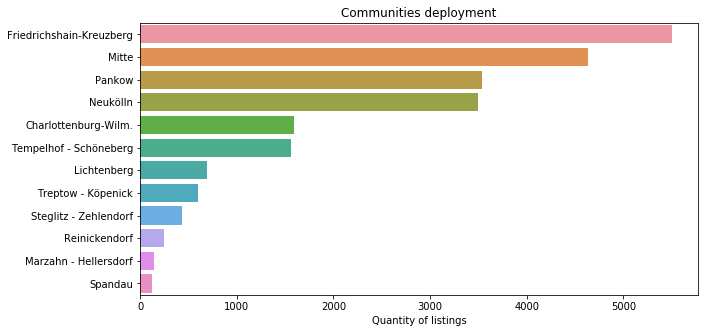

In [9]:
# Communities deployment
plt.figure(figsize=(10,5))
sns.countplot(y=df['neighbourhood_group_cleansed'], order = df.neighbourhood_group_cleansed.value_counts().index)
plt.xlabel('Quantity of listings', fontsize='medium')
plt.ylabel('')
plt.title('Communities deployment', fontsize='large')

Text(0.5, 1.0, 'Property type')

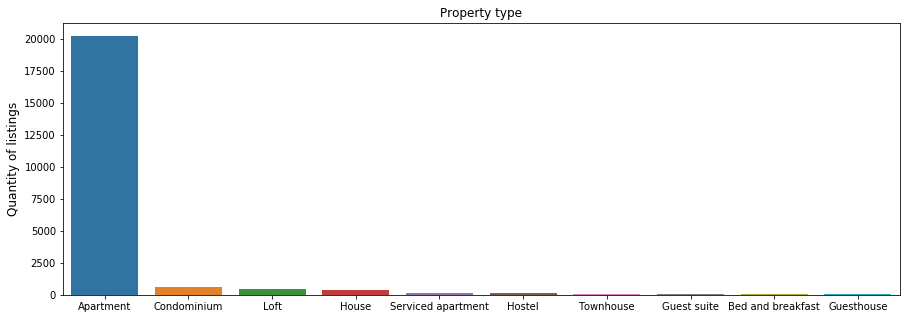

In [10]:
# Property type deployment - TOP-10 types
plt.figure(figsize=(15,5))
sns.countplot(df['property_type'], order = df.property_type.value_counts().iloc[:10].index)
plt.xlabel('')
plt.ylabel('Quantity of listings', fontsize='large')
plt.title('Property type')

Text(0.5, 1.0, 'Room type')

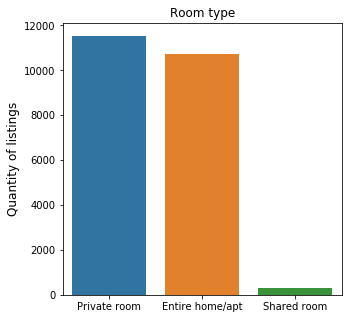

In [11]:
# Room type deployment
plt.figure(figsize=(5,5))
sns.countplot(df['room_type'], order = df.room_type.value_counts(normalize=True).index)
plt.xlabel('')
plt.ylabel('Quantity of listings', fontsize='large')
plt.title('Room type')

# 'price' and other money related columns

In [12]:
# Cleaning (replace '$') and formating price-related columns 
df.price = df.price.str.replace('$', '').str.replace(',', '').astype(float)
df.security_deposit = df.security_deposit.str.replace('$', '').str.replace(',', '').astype(float)
df.cleaning_fee = df.cleaning_fee.str.replace('$', '').str.replace(',', '').astype(float)
df.extra_people = df.extra_people.str.replace('$', '').str.replace(',', '').astype(float)

# NaNs in security_deposit and cleaning_fee seem to be 0
df.security_deposit.fillna(0, inplace=True)
df.cleaning_fee.fillna(0, inplace=True)

In [13]:
# Checking suspiciously low prices
print(df[(['price', 'name'])][(df.price < 10)])

          price                                               name
id                                                                
265402      9.0                            Nice room for 3 persons
265408      9.0                       Elegant 4-bed room in Berlin
265416      9.0                      Colorful 6-bed-room in Berlin
265433      9.0                     Spacious 6-bed-room in Berlin 
265444      9.0                  Nice and big 8-bed-room in Berlin
2161434     8.0                  Nice room in the heart of Berlin!
2382613     9.0                Privatzimmer Berlin-Zehlendorf (Bl)
3108596     9.0                      Spacious 6-bed room in Berlin
3108686     9.0                  Nice and big 8-bed-room in Berlin
3109015     9.0                     Schönes 8-Bettzimmer in Berlin
3109139     9.0                  Nice and big 8-bed-room in Berlin
8021361     9.0                               Cheap Room in Berlin
10961123    9.0                Room in a flat share /Gesundbru

In [14]:
# Dropping rows with price <8$
df = df.drop(df[df.price < 8].index)

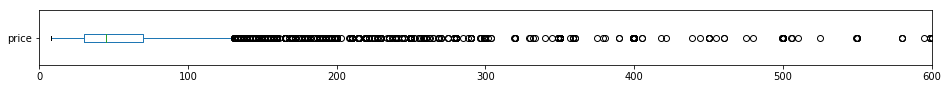

In [15]:
# Checking suspiciously high prices
df['price'].plot(kind='box', xlim=(0, 600), vert=False, figsize=(16,1));

In [16]:
# Dropping rows with extremely high price
df = df.drop(df[df.price > 380].index)

# Extracting and working out data re room size

In [17]:
# Extract numbers that may contain info re square of rooms from 'description' columns (contains ' s/m/S/M')
df['room_size'] = df['description'].str.extract("(\d{2,3}\s[smSM])", expand=True)
df['room_size'] = df['room_size'].str.replace("\D", "").astype(float)

rv = len(df) - df['room_size'].isna().sum()
print('Real values in "room_size" column:      ', rv)
print('Real values in "room_size" column (%):  ', round(rv/len(df)*100,1), '%')

# (C) This cell of code was taken from the original research, done by Britta Bettendorf

Real values in "room_size" column:       8017
Real values in "room_size" column (%):   35.8 %


In [18]:
# Extract numbers that may contain info re square of rooms from 'name' columns (contains ' s/m/S/M')
df['room_size_name'] = df['name'].str.extract("(\d{2,3}\s[smSM])", expand=True)
df['room_size_name'] = df['room_size_name'].str.replace("\D", "").astype(float)

rv = len(df) - df['room_size_name'].isna().sum()
print('Real values in "room_size_name" column:      ', rv)
print('Real values in "room_size_name" column (%):  ', round(rv/len(df)*100,1), '%')

# (C) This cell of code was taken from the original research, done by Britta Bettendorf

Real values in "room_size_name" column:       341
Real values in "room_size_name" column (%):   1.5 %


In [19]:
df.room_size.fillna(0, inplace=True)

In [20]:
# Updating column 'room_size' with values extracted from column 'name'
df.loc[df['room_size'] == 0, 'room_size'] = df['room_size_name']

In [21]:
# We don't need it any more
df.drop(['room_size_name'], axis=1, inplace=True)

In [22]:
# Checking suspiciously low sizes
print(df[(['room_size', 'name'])][(df.room_size < 10)])

          room_size                                         name
id                                                              
42809           2.0                 The Berlin Artist Apartment.
253005          5.0               Pension am Traveplatz Zimmer 3
8270083         1.0              One room flat in Friedrichshain
20797480        7.0   Gemütliche 2-Zimmer Wohnung mitten im Kiez
22388226        3.0  #03 mini apartment +kitchen +super location


In [23]:
# Dropping rows with suspiciously low sizes
df = df.drop(df[df.room_size < 10].index)

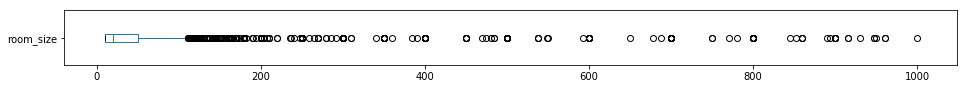

In [24]:
# Checking suspiciously high sizes
df['room_size'].plot(kind='box', vert=False, figsize=(16,1));

In [25]:
print(df[(['room_size', 'name'])][(df.room_size > 250)])

          room_size                                               name
id                                                                    
9991          780.0                Geourgeous flat - outstanding views
40600         310.0                 room-artist loft berlin kreuzberg 
63468         500.0                            Ferienwohnung Kreuzberg
83614         960.0  Spacious & Elegant Flat, 2 bathrooms, full kit...
179102        800.0  registered, legal hughe penthouse for 1-2 fami...
192050        538.0             Perfect for 5 + WLAN near (URL HIDDEN)
194546        300.0                Central modern 2-room flat in Mitte
255778        300.0                 Beautiful apt. in a great location
279315        538.0            Flat in Neukölln (Postmodern Cloister )
311703        400.0          Elegant 4 Room Apartment with 2 Bathrooms
355227        300.0                Il Nido - Berlin's downtown for 2/3
362701        300.0                Stylish lodge in the heart of Kreuz
380384

In [26]:
# Dropping values of suspiciously high sizes
df.loc[df['room_size'] > 250, 'room_size'] = ''
df.room_size.replace(to_replace='', value=np.nan, inplace=True)

In [27]:
# We have 'NaN's in our column, 2/3 of all values
df.room_size.isna().sum()

14587

In [28]:
df.isna().sum()

name                               58
summary                           935
description                       201
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
bed_type                            0
amenities                           0
price                               0
security_deposit                    0
cleaning_fee                        0
guests_included                     0
extra_people                        0
cancellation_policy                 0
room_size                       14587
dtype: int64

In [29]:
# New df for further regression
df_temp = df[['neighbourhood_group_cleansed', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
              'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'room_size']]

In [30]:
print(df_temp.shape)
df_temp.head(10).transpose()

(22413, 11)


id,2015,2695,3176,3309,7071,9991,14325,16401,16644,17409
neighbourhood_group_cleansed,Mitte,Pankow,Pankow,Tempelhof - Schöneberg,Pankow,Pankow,Pankow,Friedrichshain-Kreuzberg,Friedrichshain-Kreuzberg,Pankow
accommodates,3,2,4,2,2,7,2,2,5,2
bathrooms,1,1,1,1,1,2.5,1,1,1,1
bedrooms,1,1,1,1,1,4,0,1,1,1
beds,2,1,2,1,2,7,1,2,3,1
price,60,17,90,26,42,180,70,120,90,45
security_deposit,200,0,200,250,0,400,500,0,500,0
cleaning_fee,30,0,50,30,0,80,0,0,50,18
guests_included,1,1,2,1,1,5,1,1,2,1
extra_people,28,0,20,18,24,10,0,13,20,26


In [31]:
# Taking care of categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
categorical_cols = ['neighbourhood_group_cleansed']
df_temp[categorical_cols] = df_temp[categorical_cols].apply(lambda col: labelencoder_X.fit_transform(col.astype(str)))
df_temp.head(10).transpose()

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


id,2015,2695,3176,3309,7071,9991,14325,16401,16644,17409
neighbourhood_group_cleansed,4.0,6.0,6.0,10.0,6.0,6.0,6.0,1.0,1.0,6.0
accommodates,3.0,2.0,4.0,2.0,2.0,7.0,2.0,2.0,5.0,2.0
bathrooms,1.0,1.0,1.0,1.0,1.0,2.5,1.0,1.0,1.0,1.0
bedrooms,1.0,1.0,1.0,1.0,1.0,4.0,0.0,1.0,1.0,1.0
beds,2.0,1.0,2.0,1.0,2.0,7.0,1.0,2.0,3.0,1.0
price,60.0,17.0,90.0,26.0,42.0,180.0,70.0,120.0,90.0,45.0
security_deposit,200.0,0.0,200.0,250.0,0.0,400.0,500.0,0.0,500.0,0.0
cleaning_fee,30.0,0.0,50.0,30.0,0.0,80.0,0.0,0.0,50.0,18.0
guests_included,1.0,1.0,2.0,1.0,1.0,5.0,1.0,1.0,2.0,1.0
extra_people,28.0,0.0,20.0,18.0,24.0,10.0,0.0,13.0,20.0,26.0


In [32]:
# Arranging datasets by existence of 'room_size' value
train_set = df_temp[df_temp['room_size'].notnull()]
test_set  = df_temp[df_temp['room_size'].isnull()]

# Arranging X-training and X-testing datasets
X_train = train_set.drop('room_size', axis=1)
X_test  = test_set.drop('room_size', axis=1)

# Arranging y-training datasets
y_train = train_set['room_size']

In [33]:
# Regression model
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 123)
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test) 

In [34]:
# Indroduction of predicted data to the main dataset 'df'
y_pred = pd.DataFrame(y_pred)
y_pred.columns = ['room_size']

In [35]:
temp_id = pd.DataFrame(X_test.index)
temp_id.columns = ['temp_id']

y_pred = pd.concat([y_pred, temp_id], axis=1)
y_pred.set_index(['temp_id'], inplace=True)

df_pred = pd.concat([X_test, y_pred], axis=1)
df_pred.head()

,neighbourhood_group_cleansed,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,room_size
3176,6,4,1.0,1.0,2.0,90.0,200.0,50.0,2,20.0,48.923333
9991,6,7,2.5,4.0,7.0,180.0,400.0,80.0,5,10.0,98.233333
14325,6,2,1.0,0.0,1.0,70.0,500.0,0.0,1,0.0,39.571745
17904,5,2,1.0,1.0,1.0,49.0,0.0,50.0,1,15.0,64.153333
20858,6,4,1.0,2.0,2.0,129.0,500.0,49.0,2,24.0,57.726667


In [36]:
df_pred.shape

(14587, 11)

In [37]:
train_set.shape

(7826, 11)

In [38]:
df_temp = pd.DataFrame()
df_temp = pd.concat([df_pred, train_set], axis=0)
print(df_temp.shape)
df_temp.head().transpose()

(22413, 11)


,3176,9991,14325,17904,20858
neighbourhood_group_cleansed,6.000000,6.000000,6.000000,5.000000,6.000000
accommodates,4.000000,7.000000,2.000000,2.000000,4.000000
bathrooms,1.000000,2.500000,1.000000,1.000000,1.000000
bedrooms,1.000000,4.000000,0.000000,1.000000,2.000000
beds,2.000000,7.000000,1.000000,1.000000,2.000000
price,90.000000,180.000000,70.000000,49.000000,129.000000
security_deposit,200.000000,400.000000,500.000000,0.000000,500.000000
cleaning_fee,50.000000,80.000000,0.000000,50.000000,49.000000
guests_included,2.000000,5.000000,1.000000,1.000000,2.000000
extra_people,20.000000,10.000000,0.000000,15.000000,24.000000


In [39]:
# Checking again suspiciously low sizes
print(df_temp[(['room_size'])][(df_temp.room_size < 10)])

Empty DataFrame
Columns: [room_size]
Index: []


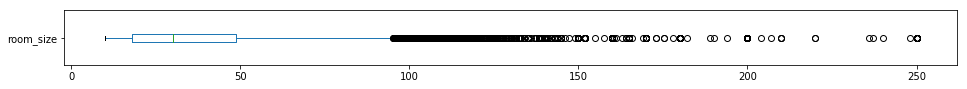

In [40]:
# Checking again suspiciously high sizes
df_temp['room_size'].plot(kind='box', vert=False, figsize=(16,1));

In [41]:
print(df.shape)
df.head(2).transpose()

(22413, 21)


id,2015,2695
name,Berlin-Mitte Value! Quiet courtyard/very central,Prenzlauer Berg close to Mauerpark
summary,Great location! 30 of 75 sq meters. This wood...,NaN
description,Great location! 30 of 75 sq meters. This wood...,In the summertime we are spending most of our ...
neighbourhood_group_cleansed,Mitte,Pankow
latitude,52.5345,52.5485
longitude,13.4026,13.4046
property_type,Guesthouse,Apartment
room_type,Entire home/apt,Private room
accommodates,3,2
bathrooms,1,1


In [42]:
print(df_temp.shape)
df_temp.head().transpose()

(22413, 11)


,3176,9991,14325,17904,20858
neighbourhood_group_cleansed,6.000000,6.000000,6.000000,5.000000,6.000000
accommodates,4.000000,7.000000,2.000000,2.000000,4.000000
bathrooms,1.000000,2.500000,1.000000,1.000000,1.000000
bedrooms,1.000000,4.000000,0.000000,1.000000,2.000000
beds,2.000000,7.000000,1.000000,1.000000,2.000000
price,90.000000,180.000000,70.000000,49.000000,129.000000
security_deposit,200.000000,400.000000,500.000000,0.000000,500.000000
cleaning_fee,50.000000,80.000000,0.000000,50.000000,49.000000
guests_included,2.000000,5.000000,1.000000,1.000000,2.000000
extra_people,20.000000,10.000000,0.000000,15.000000,24.000000


In [43]:
df = df[['property_type', 'amenities', 'cancellation_policy']]
print(df.shape)
df.isna().sum()

(22413, 3)


property_type          0
amenities              0
cancellation_policy    0
dtype: int64

In [44]:
df = pd.concat([df, df_temp], axis=1)
df.head(3).transpose()

,2015,2695,3176
property_type,Guesthouse,Apartment,Apartment
amenities,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...","{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...","{Internet,Wifi,Kitchen,""Buzzer/wireless interc..."
cancellation_policy,strict_14_with_grace_period,flexible,strict_14_with_grace_period
neighbourhood_group_cleansed,4,6,6
accommodates,3,2,4
bathrooms,1,1,1
bedrooms,1,1,1
beds,2,1,2
price,60,17,90
security_deposit,200,0,200


In [45]:
print(df.shape)
df.isna().sum()

(22413, 14)


property_type                   0
amenities                       0
cancellation_policy             0
neighbourhood_group_cleansed    0
accommodates                    0
bathrooms                       0
bedrooms                        0
beds                            0
price                           0
security_deposit                0
cleaning_fee                    0
guests_included                 0
extra_people                    0
room_size                       0
dtype: int64

# Amenities score introduction

This is very simple idea to score the quantity of amenities, assuming more the room has, more price might be.

In [46]:
# Let's explore amenities
pd.set_option('display.max_colwidth', -1)
df.amenities.head(5)

2015    {TV,"Cable TV",Wifi,Kitchen,Gym,Heating,"Family/kid friendly","Smoke detector",Essentials,Shampoo,"Lock on bedroom door",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Private living room",Bathtub,"Hot water","Bed linens","Extra pillows and blankets",Microwave,"Coffee maker",Refrigerator,Dishwasher,"Dishes and silverware","Cooking basics",Stove,"Luggage dropoff allowed","Long term stays allowed"}                                                                                                                  
2695    {Wifi,Kitchen,Elevator,Heating,Washer,Essentials,Shampoo,"Hair dryer","Laptop friendly workspace","Private living room"}                                                                                                                                                                                                                                                                                                                                                      

In [47]:
# Let's introduce new column with score of amenities
df['amen_score'] = df['amenities'].str.count(',') +1

In [48]:
# We don't need it any more
df.drop(['amenities'], axis=1, inplace=True)

In [49]:
df.head().transpose()

,2015,2695,3176,3309,7071
property_type,Guesthouse,Apartment,Apartment,Apartment,Apartment
cancellation_policy,strict_14_with_grace_period,flexible,strict_14_with_grace_period,strict_14_with_grace_period,moderate
neighbourhood_group_cleansed,4,6,6,10,6
accommodates,3,2,4,2,2
bathrooms,1,1,1,1,1
bedrooms,1,1,1,1,1
beds,2,1,2,1,2
price,60,17,90,26,42
security_deposit,200,0,200,250,0
cleaning_fee,30,0,50,30,0


In [50]:
df.isna().sum()

property_type                   0
cancellation_policy             0
neighbourhood_group_cleansed    0
accommodates                    0
bathrooms                       0
bedrooms                        0
beds                            0
price                           0
security_deposit                0
cleaning_fee                    0
guests_included                 0
extra_people                    0
room_size                       0
amen_score                      0
dtype: int64

# Gradient Boosting Regression

In [51]:
#A separate copy for TF
df_tf = df.copy()

In [52]:
# Taking care of categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
categorical_cols = ['property_type','cancellation_policy']
df[categorical_cols] = df[categorical_cols].apply(lambda col: labelencoder_X.fit_transform(col.astype(str)))
df.head(10).transpose()

,2015,2695,3176,3309,7071,9991,14325,16401,16644,17409
property_type,16.0,1.0,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0,13.0
cancellation_policy,2.0,0.0,2.000000,2.0,1.0,2.000000,2.000000,2.0,2.0,2.0
neighbourhood_group_cleansed,4.0,6.0,6.000000,10.0,6.0,6.000000,6.000000,1.0,1.0,6.0
accommodates,3.0,2.0,4.000000,2.0,2.0,7.000000,2.000000,2.0,5.0,2.0
bathrooms,1.0,1.0,1.000000,1.0,1.0,2.500000,1.000000,1.0,1.0,1.0
bedrooms,1.0,1.0,1.000000,1.0,1.0,4.000000,0.000000,1.0,1.0,1.0
beds,2.0,1.0,2.000000,1.0,2.0,7.000000,1.000000,2.0,3.0,1.0
price,60.0,17.0,90.000000,26.0,42.0,180.000000,70.000000,120.0,90.0,45.0
security_deposit,200.0,0.0,200.000000,250.0,0.0,400.000000,500.000000,0.0,500.0,0.0
cleaning_fee,30.0,0.0,50.000000,30.0,0.0,80.000000,0.000000,0.0,50.0,18.0


In [54]:
# Creating DV and IV sets
X = df.drop('price', axis=1)
y = df['price']

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=123)

In [55]:
# Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(n_estimators = 100, max_depth = 3, min_samples_split = 2, learning_rate = 0.1)
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Finding the mean_squared error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

# Finding the r2 score or the variance (R2)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_test, y = y_test, cv = 10)

# Printing metrics
print("RMSE Error:", round(np.sqrt(mse), 2))
print("R2 Score:", round(r2, 4))
print("Mean accuracy:", round(accuracies.mean(), 2))
print("Std deviation:", round(accuracies.std(), 4))

RMSE Error: 27.88
R2 Score: 0.5523
Mean accuracy: 0.53
Std deviation: 0.0507


# Tensor Flow DNN-Regressor

In [56]:
import tensorflow as tf

In [57]:
# Creating DV and IV sets
X_tf = df_tf.drop('price', axis=1)
y_tf = df_tf['price']

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tf, y_tf, test_size = 0.25, random_state=123)

In [58]:
# Feature columns
property_type = tf.feature_column.categorical_column_with_hash_bucket('property_type', hash_bucket_size=50)
cancellation_policy = tf.feature_column.categorical_column_with_hash_bucket('cancellation_policy', hash_bucket_size=10)
neighbourhood_group_cleansed = tf.feature_column.numeric_column('neighbourhood_group_cleansed')
accommodates = tf.feature_column.numeric_column('accommodates')
bathrooms = tf.feature_column.numeric_column('bathrooms')
bedrooms = tf.feature_column.numeric_column('bedrooms')
beds = tf.feature_column.numeric_column('beds')
security_deposit = tf.feature_column.numeric_column('security_deposit')
cleaning_fee = tf.feature_column.numeric_column('cleaning_fee')
guests_included = tf.feature_column.numeric_column('guests_included')
room_size = tf.feature_column.numeric_column('room_size')
amen_score = tf.feature_column.numeric_column('amen_score')

In [59]:
emb_property_type = tf.feature_column.embedding_column(property_type, dimension=33)
emb_cancellation_policy = tf.feature_column.embedding_column(cancellation_policy, dimension=5)

In [60]:
feat_cols = [emb_property_type, emb_cancellation_policy, neighbourhood_group_cleansed, accommodates, bathrooms,
             bedrooms, beds, security_deposit, cleaning_fee, guests_included, room_size, amen_score]

In [61]:
# Input function
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=100,num_epochs=1000,shuffle=True)

In [62]:
# Creating and training model
model = tf.estimator.DNNRegressor(hidden_units=[12,12,12], feature_columns = feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\andre\\AppData\\Local\\Temp\\tmp9c6p7nax', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020225582C88>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [63]:
model.train(input_fn=input_func, steps = 10000)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\andre\AppData\Local\Temp\tmp9c6p7nax\model.ckpt.
INFO:tensorflow:loss = 510098.0, step = 0
INFO:tensorflow:global_step/sec: 109.638
INFO:tensorflow:loss = 72357.26, st

INFO:tensorflow:loss = 56895.57, step = 5800 (0.750 sec)
INFO:tensorflow:global_step/sec: 133.507
INFO:tensorflow:loss = 103375.43, step = 5900 (0.749 sec)
INFO:tensorflow:global_step/sec: 133.954
INFO:tensorflow:loss = 145129.75, step = 6000 (0.747 sec)
INFO:tensorflow:global_step/sec: 134.49
INFO:tensorflow:loss = 41371.508, step = 6100 (0.744 sec)
INFO:tensorflow:global_step/sec: 133.507
INFO:tensorflow:loss = 101761.56, step = 6200 (0.749 sec)
INFO:tensorflow:global_step/sec: 134.134
INFO:tensorflow:loss = 120562.69, step = 6300 (0.746 sec)
INFO:tensorflow:global_step/sec: 133.684
INFO:tensorflow:loss = 89721.695, step = 6400 (0.749 sec)
INFO:tensorflow:global_step/sec: 133.863
INFO:tensorflow:loss = 54507.195, step = 6500 (0.746 sec)
INFO:tensorflow:global_step/sec: 133.153
INFO:tensorflow:loss = 74550.54, step = 6600 (0.751 sec)
INFO:tensorflow:global_step/sec: 133.864
INFO:tensorflow:loss = 37562.156, step = 6700 (0.747 sec)
INFO:tensorflow:global_step/sec: 134.224
INFO:tensorfl

In [64]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10, num_epochs=1, shuffle=False)

In [65]:
predictions = list(model.predict(pred_input_func))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\andre\AppData\Local\Temp\tmp9c6p7nax\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [66]:
y_pred = []
for i in predictions:
    y_pred.append(i['predictions'][0])

In [67]:
from sklearn.metrics import mean_squared_error
tf_mse = mean_squared_error(y_test, y_pred)
print("MSE Error:", round(tf_mse, 2))
print("RMSE Error:", round(np.sqrt(tf_mse), 2))

MSE Error: 896.01
RMSE Error: 29.93


# Brief summary

As we can see in that particular case Gradient Boosting Regression showed a bit better result than TensorFlow DNN-Regressor.

In [68]:
print("Gradient Boosting Regression RMSE Error: ", round(mse**0.5, 2))
print("TensorFlow DNN Regression RMSE Error:    ", round(tf_mse**0.5, 2))

Gradient Boosting Regression RMSE Error:  27.88
TensorFlow DNN Regression RMSE Error:     29.93
